<a href="https://colab.research.google.com/github/lblogan14/deep_learning_for_computer_vision/blob/master/ch8_generative_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My' 'Drive/Colab' 'Notebooks/Deep_Learning_for_Computer_Vision/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Deep_Learning_for_Computer_Vision


#Generative Model Applications

##Artistic Style Transfer
is the process of transferring the style of art to any image.

![alt text](https://github.com/lblogan14/deep_learning_for_computer_vision/blob/master/notes_images/ch8/style_transfer.JPG?raw=true)

##Predict the Next Frame in a Video
![alt text](https://github.com/lblogan14/deep_learning_for_computer_vision/blob/master/notes_images/ch8/predict_next_frame.JPG?raw=true)

The images on the left side are the models from the previous frame, and there are two algorithms on the right side compared with respect to the ground truth.

##Super-resolution of Images
is the process of creating higher resolution images from a smaller image. Traditionally, interpolations were used to create such bigger
images. But interpolation misses the high-frequency details by giving a
smoothened effect. Generative models that are trained for this specific purpose
of super-resolution create images with excellent details.
![alt text](https://github.com/lblogan14/deep_learning_for_computer_vision/blob/master/notes_images/ch8/super_resolution.JPG?raw=true)

The left side is generated with **4x scaling** and looks indistinguishable from the original on the right.

Super-resolution is useful for rendering a low-resolution image on a high-quality
display or print. Another application could be a reconstruction of compressed
images with good quality.

##Interactive Image Generation
A user can add edits and the images can be generated, reflecting the edits:

![alt text](https://github.com/lblogan14/deep_learning_for_computer_vision/blob/master/notes_images/ch8/image_interaction.JPG?raw=true)

As shown, the images are generated based on the shape and color of the edits. A
green color stroke at the bottom creates a grassland, a rectangle creates a
skyscraper and so on. The images will be generated and fine-tuned with further
inputs from the user. The generated image can also be used to retrieve the most
similar real image that can be utilized. Interactive image generation provides an
entirely new way of searching images intuitively.

##Image to Image Translation
is the process that an image can be used to generate other images with specific objectives.

![alt text](https://github.com/lblogan14/deep_learning_for_computer_vision/blob/master/notes_images/ch8/image_translation.JPG?raw=true)

A drawing with a label can be converted to a realistic image for creative
purposes. A black and white image can be translated to a color image.

##Text to Image Generation
Images can be generated from text descriptions, and the steps for this are similar
to the image to image translation.

![alt text](https://github.com/lblogan14/deep_learning_for_computer_vision/blob/master/notes_images/ch8/text_to_image.JPG?raw=true)

##Inpainting
is the process of filling a gap within the image:

![alt text](https://github.com/lblogan14/deep_learning_for_computer_vision/blob/master/notes_images/ch8/inpainting.JPG?raw=true)

The image on the left is the normal image and the one on the right is the
processed image. As you can see from the image, the unwanted things are
removed from the picture. Inpainting is useful for removing unwanted objects
from the image, and also for filling in the space of scanned artwork.

##Blending
is the process of pasting a part of an image ove another image smoothly, without any artifacts.

![alt text](https://github.com/lblogan14/deep_learning_for_computer_vision/blob/master/notes_images/ch8/blending.JPG?raw=true)

The image a shown here shows a case where
one image is placed on another, which gives a bad impression. 

The images b and c represent the conventional blending techniques such as the modified Poisson
method and a multi-spline method, respectively.

The final image, or the image d, shows the results of a generative method of
blending which gives a much better result than the other methods

##Attribute Transformations
The attributes of images can be changed using generative models. A person's
face could be modified to reflect different attributes such as gender, glasses, age,
and so on.

![alt text](https://github.com/lblogan14/deep_learning_for_computer_vision/blob/master/notes_images/ch8/transform_attributes.JPG?raw=true)

##Create Training Data
Generative models can be used for generating training at a larger scale and can
even be used to refine the synthetic images created for training.

##Create New Animation Characters
Generative models can be used for creating new animation characters with
various conditions such as facial expressions, hairstyles, costumes, and so on.

##3D Models from Photos
![alt text](https://github.com/lblogan14/deep_learning_for_computer_vision/blob/master/notes_images/ch8/3d_from_photos.JPG?raw=true)

Creating 3D models from images is useful for robotics, augmented reality and in
animation industries.

#Tensorflow Implementations

##Neural Artistic Style Transfer
The artistic style transfer
technique transforms an image to look like a painting with a specific painting
style.

The loss function compares the generated image with the content of the photo and stye of the painting. The optimization is applied for the image pixel, rather than the weights of the network. Two values are calculated by comparing the content of the photo
with the generated image followed by the style of the painting and the generated
image.

###Content Loss
The CNN features of various layers are used for a better representation of the image content.

The initial layers have high-frequency such as edges, corners, and textures, whereas the later layers represent objects so they are better for content.

In [0]:
work_dir = './data/ch8/'

In [3]:
%cd ./data/ch8

/content/drive/My Drive/Colab Notebooks/Deep_Learning_for_Computer_Vision/data/ch8


In [4]:
!pip3 install keras==2.2.0

    100% |████████████████████████████████| 307kB 8.8MB/s 
    100% |████████████████████████████████| 51kB 20.8MB/s 
tensorflow 1.12.0 has requirement keras-applications>=1.0.6, but you'll have keras-applications 1.0.2 which is incompatible.
tensorflow 1.12.0 has requirement keras-preprocessing>=1.0.5, but you'll have keras-preprocessing 1.0.1 which is incompatible.
  Found existing installation: Keras-Preprocessing 1.0.5
    Uninstalling Keras-Preprocessing-1.0.5:
      Successfully uninstalled Keras-Preprocessing-1.0.5
  Found existing installation: Keras-Applications 1.0.6
    Uninstalling Keras-Applications-1.0.6:
      Successfully uninstalled Keras-Applications-1.0.6
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [5]:
import numpy as np
from PIL import Image
from scipy.optimize import fmin_l_bfgs_b
from scipy.misc import imsave
from vgg16_avg import VGG16_Avg
from keras import metrics
from keras.models import Model
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
%cd /content/drive/My Drive/Colab Notebooks/Deep_Learning_for_Computer_Vision/

/content/drive/My Drive/Colab Notebooks/Deep_Learning_for_Computer_Vision


In [0]:
# Load the image
content_image = Image.open(work_dir + 'bird_orig.png')

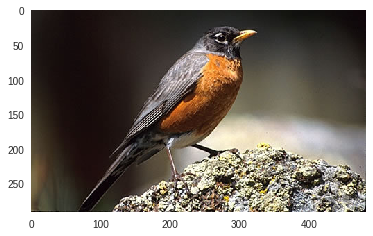

In [9]:
plt.imshow(content_image)
plt.grid('off')

The VGG architecture is applied to extract the features, so the mean of all the `ImageNet` images has to be subtracted from all the images.

In [0]:
imagenet_mean = np.array([123.68, 116.779, 103.999], dtype=np.float32)

In [0]:
def subtract_imagenet_mean(image):
  return (image - imagenet_mean)[:, :, :, ::-1]

Note: the channels are different!

The `preprocess` function takes the generated image and subtracts the mean and then reverses the channel.

The `deprocess` function reverses this effect:

In [0]:
def add_imagenet_mean(image, s):
  return np.clip(image.reshape(s)[:, :, :, ::-1] + imagenet_mean, 0, 255)

Before diving into the detailed codes, there are some concepts to be explained.

The first step of style transfer is to create an image with the content from another image, which is a process of creating an image from **random noise**. The content used here is the sum of the **activation** in some layer.

Then, the loss of the content between the random noise and image is **minimized**, which is termed as the **content loss**. This loss is similar to pixel-wise loss but applied on layer activations, so this captures the content leaving out the noise.

Next, any CNN architecture can be used to do forward inference of content image and random noise. The activations are taken and the mean squared error is calculated, comparing the activations of these two outputs.

The pixel of the random image is updated while the CNN weights are frozen. The VGG network is frozen for this case.

Now, the VGG model can be loaded. Generative images are very sensitive to subsampling techniques such as **max pooling**. Getting back the pixel values from max pooling is not possible. Hence, **average pooling** is a smoother method than max pooling. The function to convert VGG model with average pooling is used for loading the model,

In [13]:
vgg_model = VGG16_Avg(include_top=False)

/content/drive/My Drive/Colab Notebooks/Deep_Learning_for_Computer_Vision/data/ch8/vgg16_avg.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="block1_conv1", padding="same")`
  x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv1')(img_input)
/content/drive/My Drive/Colab Notebooks/Deep_Learning_for_Computer_Vision/data/ch8/vgg16_avg.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="block1_conv2", padding="same")`
  x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv2')(x)
/content/drive/My Drive/Colab Notebooks/Deep_Learning_for_Computer_Vision/data/ch8/vgg16_avg.py:51: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="block2_conv1", padding="same")`
  x = Convolution2D(128, 3, 3, activation='relu', border_mode='same', name='block2_conv1')(x)
/co

58892288/58889256 [==============================] - 1s 0us/step


Here, the weights are the same for the VGG16 model as the original, even though the pooling type has been changed from max-pooling to average-pooling.

The *ResNet* and *Inception* models are not suitable in this case because of their inability to provide various abstractions.

While the model was frozen, the activations from the last convolutional layer of the VGG model was taken and named as `block_conv1`, which is the third last layer from the VGG model with a wide receptive field:

In [0]:
content_layer = vgg_model.get_layer('block5_conv1').output

This is a new model created with a truncated VGG till the layer that was giving good features. Now the image can be loaded and can be used to carry out the forward inference to get the actually activated layers:

In [0]:
content_model = Model(vgg_model.input, content_layer)

In [0]:
content_image_array = subtract_imagenet_mean(np.expand_dims(np.array(content_image), 0))
content_image_shape = content_image_array.shape
target = K.variable(content_model.predict(content_image_array))

Next, define an evaluator class to compute the loss and gradient of the image.

In [0]:
class ConvexOptimizer(object):
  def __init__(self, cost_function, tensor_shape):
    self.cost_function = cost_function
    self.tensor_shape = tensor_shape
    self.gradient_values = None
    
  def loss(self, point):
    loss_value, self.gradient_values = self.cost_function([point.reshape(self.tensor_shape)])
    return loss_value.astype(np.float64)
  
  def gradients(self, point):
    return self.gradient_values.flatten().astype(np.float64)

The above class returns the loss and gradient values at any point of the iteration

The loss function can be defined as the MSE between the values of activations at specific convolutional layers. The loss is computed between the layers of generated image and the original content photo:

In [0]:
mse_loss = metrics.mean_squared_error(content_layer, target)

The gradients of the loss can be computed by considering the input of the model:

In [0]:
grads = K.gradients(mse_loss, vgg_model.input)

The input to the function is the input of the model and the output will be the array of loss and gradient values:

In [0]:
cost_function = K.function([vgg_model.input], [mse_loss]+grads)

This cost function is deterministic to optimize so SGD is not requried. A simple optimizer is enough as the cost function is convex and deterministic.

In [0]:
optimizer = ConvexOptimizer(cost_function, content_image_shape)

Next, the iterative optimization function is requried for this simple optimizer:

In [0]:
def optimize(optimizer, iterations, point, tensor_shape, file_name):
  for i in range(iterations):
    point, min_val, info = fmin_l_bfgs_b(optimizer.loss, 
                                         point.flatten(),
                                         fprime=optimizer.gradients,
                                         maxfun=20)
    point = np.clip(point, -127, 127)
    print('Loss: ', np.min(min_val))
    imsave(work_dir + 'gen_' + file_name + '_{}.png'.format(i), add_imagenet_mean(point.copy(), tensor_shape)[0])
  return point

The optimizer takes `loss` function, point, and gradients, and returns the updates.
A random image needs to be generated so that the content loss will be
minimized:

In [0]:
def generate_rand_img(shape):
  return np.random.uniform(-2.5, 2.5, shape)/1

In [0]:
generated_image = generate_rand_img(content_image_shape)

In [25]:
generated_image.shape

(1, 291, 483, 3)

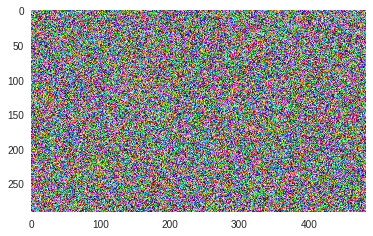

In [26]:
plt.imshow(generated_image[0])
plt.grid('off')

The plot above is the random image created.

The optimization can be run for 5 iterations to see the results:

In [0]:
iterations = 5
generated_image = optimize(optimizer,
                           iterations,
                           generated_image,
                           content_image_shape,
                           'content')

###Style Loss Using the Gram Matrix

In [0]:
# Style Transfer
style_image = Image.open(work_dir + 'starry_night.png')
style_image = style_image.resize(np.divide(style_image.size, 3.5).astype('int32'))

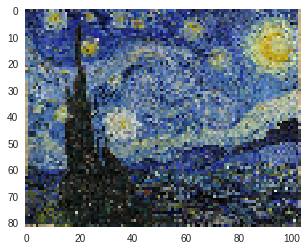

In [62]:
plt.imshow(style_image)
plt.grid('off')
# Image is down-sized due to computational complexity

Preprocess this image:

In [0]:
style_image_array = subtract_imagenet_mean(np.expand_dims(style_image, 0)[:, :, :, :3])
style_image_shape = style_image_array.shape

For this one, consider several layers instead of just one layer

In [0]:
vgg_model = VGG16_Avg(include_top=False, input_shape=style_image_shape[1:])
style_layers = {layer.name: layer.output for layer in vgg_model.layers}

Take multiple layers as an array output of the first four blocks:

In [0]:
style_features = [style_layers['block{}_conv1'.format(o)] for o in range(1,3)]
layers_model = Model(vgg_model.input, style_features)
style_targets = [K.variable(feature) for feature in layers_model.predict(style_image_array)]

Style loss is calculated using the **Gram matrix**. The Gram matrix is the product
of a matrix and its transpose. The activation values are simply transposed and
multiplied. This matrix is then used for computing the error between the style
and random images. The Gram matrix loses the location information but will
preserve the texture information.

The Gram matrix is defined below:

In [0]:
def grammian_matrix(matrix):
    flattened_matrix = K.batch_flatten(K.permute_dimensions(matrix, (2, 0, 1)))
    matrix_transpose_dot = K.dot(flattened_matrix, K.transpose(flattened_matrix))
    element_count = matrix.get_shape().num_elements()
    return matrix_transpose_dot / element_count

The Gram matrix is actually a measure of the correlation between the pair of columns. 

The height and width dimensions are flattened out. This doesn't include
any local pieces of information, as the coordinate information is disregarded.
Style loss computes the mean squared error between the Gram matrix of the
input image and the target,

In [0]:
def style_mse_loss(x, y):
    return metrics.mse(grammian_matrix(x), grammian_matrix(y))

Next, compute the loss by summing up all the activations from the various layers,

In [69]:
style_features

[<tf.Tensor 'block1_conv1_1/Relu:0' shape=(?, 82, 104, 64) dtype=float32>,
 <tf.Tensor 'block2_conv1_1/Relu:0' shape=(?, 41, 52, 128) dtype=float32>]

In [70]:
style_targets

[<tf.Variable 'Variable_1:0' shape=(1, 82, 104, 64) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(1, 41, 52, 128) dtype=float32_ref>]

In [0]:
style_loss = sum(style_mse_loss(l1[0], l2[0]) for l1, l2 in zip(style_features, style_targets))
grads = K.gradients(style_loss, vgg_model.input)
style_fn = K.function([vgg_model.input], [style_loss]+grads)
optimizer = ConvexOptimizer(style_fn, style_image_shape)

Create a random image

In [0]:
generated_image = generate_rand_img(style_image_shape)

In [0]:
generated_image = optimize(optimizer, iterations, generated_image, style_image_shape, 'style')


Next, combine the content and the style losses

###Style Transfer

In [0]:
w, h = style_image.size
src = content_image_array[:, :h, :w]

Obtain a sequence of layer outputs to compute the style
loss. As before, we need one layer output to compute the content loss. As we discussed earlier, the lower the
layer, the more exact the content reconstruction will be. In merging content
reconstruction with style, we might expect that a looser reconstruction of the
content will allow more room for the style to affect

In [0]:
outputs = {l.name: l.output for l in vgg_model.layers}

In [0]:
style_layers = [outputs['block{}_conv2'.format(o)] for o in range(1,6)]
content_name = 'block4_conv2'
content_layer = outputs[content_name]

Create a separate model for style with required output layers:

In [0]:
style_model = Model(vgg_model.input, style_layers)
style_targs = [K.variable(o) for o in style_model.predict(style_image_array)]


Create another model for the content with the content layer:

In [0]:
content_model = Model(vgg_model.input, content_layer)
content_targ = K.variable(content_model.predict(src))

Now, merge theses two models as merging their respective loss functions.

One way to tune how the reconstructions mix is by changing the factor on the content loss, which here is set to be 1/10. If the denominator is increased, the style will have a larger effect on the image, and if it is too large, the original content of the image will be obscured by an unstructured style. Likewise, if it is
too small then the image will not have enough style.

In [0]:
style_wgts = [0.05, 0.2, 0.2, 0.25, 0.3]

The loss functions are shown below:

In [0]:
loss = sum(style_loss(l1[0], l2[0])*w for l1, l2, w in zip(style_layers, style_targs, style_wgts))
loss += metrics.mse(content_layer, content_targ)/10

In [0]:
grads = tf.keras.backend.gradients(loss, vgg_model.input)
transfer_fn = tf.keras.backend.function([vgg_model.input], [loss]+grads)
evaluator = ConvexOptimizer(transfer_fn, style_image_shape)
enerated_image = generate_rand_img(style_image_shape)
generated_image = optimize(optimizer, iterations, generated_image, style_image_shape)


Content plus Style Transfer:

In [0]:
style_width, style_height = style_image.size
content_image_array = content_image_array[:, :style_height, :style_width]

style_layers_2 = [style_layers['block{}_conv2'.format(block_no)] for block_no in range(1,6)]
content_layer = style_layers['block4_conv2']

style_model = Model(vgg_model.input, style_layers_2)
style_targets = [K.variable(o) for o in style_model.predict(style_image_array)]

content_model = Model(vgg_model.input, content_layer)
content_target = K.variable(content_model.predict(content_image_array))

style_weights = [0.05, 0.2, 0.2, 0.25, 0.3]

style_loss = sum(style_loss(l1[0], l2[0])*w for l1, l2, w in zip(style_layers_2, style_targets, style_weights))
content_loss = metrics.mse(content_layer, content_target)/10
loss = style_loss + content_loss

gradients = K.gradients(loss, vgg_model.input)
transfer_fn = K.function([vgg_model.input], [loss]+gradients)
optimizer = ConvexOptimizer(transfer_fn, style_image_shape)
generated_image = generate_rand_img(style_image_shape)
generated_image = optimize(optimizer, iterations, generated_image, style_image_shape)

##Generative Adversarial Networks
is an unsupervised algorithm where two neural networks are trained
as a discriminator and a generator, simultaneously. The technique can generate
an image from random noise and a discriminator can evaluate whether is an
original image. After further training, the generator network can generate photo-
realistic images. The generator network is typically a deconvolutional neural
network and the discriminator is a convolution neural network.

###Vanilla GAN
To construct the model more efficiently, we need to create a few layers and some parameters:

In [0]:
tf.reset_default_graph()
K.clear_session()

In [0]:
batch_size = 32
input_dimension = [227, 227]
real_images = None
labels = None
input_images = None

In [0]:
def add_variable_summary(tf_variable, summary_name):
  with tf.name_scope(summary_name + '_summary'):
    mean = tf.reduce_mean(tf_variable)
    tf.summary.scalar('Mean', mean)
    
    with tf.name_scope('standard_deviation'):
      standard_deviation = tf.sqrt(tf.reduce_mean(tf.square(tf_variable - mean)))
    
    tf.summary.scalar('StandardDeviation', standard_deviation)
    tf.summary.scalar('Maximum', tf.reduce_max(tf_variable))
    tf.summary.scalar('Maximum', tf.reduce_max(tf_variable))
    tf.summary.scalar('Minimum', tf.reduce_min(tf_variable))
    tf.summary.histogram('Histogram', tf_variable)

In [0]:
def convolution_layer(input_layer,
                      filters,
                      kernel_size=[4,4],
                      activation=tf.nn.leaky_relu):
  layer = tf.layers.conv2d(inputs=input_layer,
                           filters=filters,
                           kernel_size=kernel_size,
                           activation=activation,
                           kernel_regularizer=tf.nn.l2_loss,
                           bias_regularizer=tf.nn.l2_loss)
  add_variable_summary(layer, 'convolution')
  return layer

In [0]:
def transpose_convolution_layer(input_layer,
                                filters,
                                kernel_size=[4,4],
                                activation=tf.nn.relu,
                                strides=2):
  layer = tf.layers.conv2d_transpose(inputs=input_layer,
                                     filters=filters,
                                     kernel_size=kernel_size,
                                     activation=activation,
                                     strides=strides,
                                     kernel_regularizer=tf.nn.l2_loss,
                                     bias_regularizer=tf.nn.l2_loss)
  add_variable_summary(layer, 'transpose_convolution')
  return layer

In [0]:
def pooling_layer(input_layer,
                  pool_size=[2,2],
                  strides=2):
  layer = tf.layers.max_pooling2d(inputs=input_layer,
                                  pool_size=pool_size,
                                  strides=strides)
  add_variable_summary(layer, 'pooling')
  return layer

Next, define a dense layer with non-linear activations,

In [0]:
def dense_layer(input_layer,
                units,
                activation=tf.nn.relu):
  layer = tf.layers.dense(inputs=input_layer,
                          units=units,
                          activation=activation)
  add_variable_summary(layer, 'dense')
  return layer

Now, define the **generator** that takes noise as an input and changes into an image.

The generator consists of a couple of fully connected layers followed by
transpose convolution layers to upsample the noise. Finally, a convolution layer
is presented to make the noise as a single channel. There are batch normalization
layers between every layer for gradients to flow smoothly.

In [0]:
def get_generator(input_noise, is_training=True):
  generator = dense_layer(input_noise, 1024)
  generator = tf.layers.batch_normalization(generator, training=is_training)
  
  generator = dense_layer(generator, 7 * 7 * 256)
  generator = tf.layers.batch_normalization(generator, training=is_training)
  
  generator = tf.reshape(generator, [-1, 7, 7, 256])
  generator = transpose_convolution_layer(generator, 64)
  generator = tf.layers.batch_normalization(generator, training=is_training)
  
  generator = transpose_convolution_layer(generator, 32)
  generator = tf.layers.batch_normalization(generator, training=is_training)
  
  generator = convolution_layer(generator, 3)
  generator = convolution_layer(generator, 1, activation=ttf.nn.tanh)
  print(generator)
  return generator

Next, define the **discriminator** that takes images and tries to distinguish fake from real images.

The discriminator is a regular convolutional net with a few `convolutional_layers` followed by dense layers. Batch
normalization layers are present in-between the layers.

In [0]:
def get_discriminator(image, is_training=True):
  x_input_reshape = tf.reshape(image, 
                               [-1, 28, 28, 1],
                               name='input_reshape')
  discriminator = convolution_layer(x_input_reshape, 64)
  discriminator = convolution_layer(discriminator, 128)
  discriminator = tf.layers.flatten(discriminator)
  discriminator = dense_layer(discriminator, 1024)
  discriminator = tf.layers.batch_normalization(discriminator, training=is_training)
  discriminator = dense_layer(discriminator, 2)
  return discriminator

Next, create a noise vector used to be the input to the generator:

In [0]:
input_noise = tf.random_normal([batch_size, input_dimension[0], input_dimension[1]])

The GAN model can be created with the `tf.contrib.gan` module in TensorFlow. It
takes the generator and discriminator methods along with their corresponding inputs:

In [0]:
gan = tf.contrib.gan.gan_model(get_generator,
                               get_discriminator,
                               real_images,
                               input_noise)

Now start the training process,

In [0]:
tf.contrib.gan.gan_train(
    tf.contrib.gan.gan_train_ops(gan,
                                 tf.contrib.gan.gan_loss(gan),
                                 tf.train.AdamOptimizer(0.001),
                                 tf.train.AdamOptimizer(0.0001)
                                )
)

A GAN model is created which outputs images from random vectors. The generated images are unconstrained and can be from any label.

###Conditional GAN
The conditional GAN is able to produce the output we want instead of random labeled images.

The helper functions defined above stay the same. The only difference for conditional GAN here is to provide the `input_noise` and `label` as a tuple into the `gan_model` instead of just the `input_noise` as the vanilla GAN.

In [0]:
cond_gan = tf.contrib.gan.gan_model(get_generator,
                                    get_discriminator,
                                    real_images,
                                    (input_noise, labels)
                                   )

The training process stays the same as the vanilla GAN

###Image Compression GAN
Use a GAN to compress the images. To achieve this, we need to define the adverserial loss with some helper functions we need to define before constructing the GAN model. In addition, the generator is replaced by a powerful autoencoder here.

In [0]:
def fully_connected_layer(input_layer, units):
  return tf.layers.dense(input_layer,
                         units=units,
                         activation=tf.nn.relu)

In [0]:
def convolutional_layer(input_layer, filter_size):
  return tf.layers.conv2d(input_layer,
                          filters=filter_size,
                          kernel_initiailizer=tf.contrib.layers.xavier_initializer_conv2d(),
                          kernel_size=3,
                          strides=2)

In [0]:
def deconvolutional_layer(input_layer, filter_size, activation=tf.nn.relu):
  return tf.layers.conv2d_transpose(input_layer,
                                    filters=filter_size,
                                    kernel_initializer=tf.contrib.layers.xavier_iniitializer_conv2d(),
                                    kernel_size=3,
                                    activation=activation,
                                    strides=2)

Now we can create the autoencoder used to replace the generator,

In [0]:
def get_autoencoder():
  input_layer = tf.placeholder(tf.float32, [None, 128, 128, 3])
  convolution_layer_1 = convolutional_layer(input_layer, 1024)
  convolution_layer_2 = convolutional_layer(convolution_layer_1, 512)
  convolution_layer_3 = convolutional_layer(convolution_layer_2, 256)
  convolution_layer_4 = convolutional_layer(convolution_layer_3, 128)
  convolution_layer_5 = convolutional_layer(convolution_layer_4, 32)
  
  convolution_layer_5_flattened = tf.layers.flatten(convolution_layer_5)
  bottleneck_layer = fully_connected_layer(convolution_layer_5_flattened, 16)
  c5_shape = convolution_layer_5.get_shape().as_list()
  c5f_flat_shape = convolution_layer_5_flattened.get_shape().as_list()[1]
  fully_connected = fully_connected_layer(bottleneck_layer, c5f_flat_shape)
  fully_connected = tf.reshape(fully_connected,
                               [-1, c5_shape[1], c5_shape[2], c5_shape[3]])
  
  deconvolution_layer_1 = deconvolutional_layer(fully_connected, 128)
  deconvolution_layer_2 = deconvolutional_layer(deconvolution_layer_1, 256)
  deconvolution_layer_3 = deconvolutional_layer(deconvolution_layer_2, 512)
  deconvolution_layer_4 = deconvolutional_layer(deconvolution_layer_3, 1024)
  deconvolution_layer_5 = deconvolutional_layer(deconvolution_layer_4, 3, activation=tf.nn.tanh)
  
  return deconvolution_layer_5

Next, create the GAN model as usual,

In [0]:
gan = tf.contrib.gan.gan_model(get_autoencoder,
                               get_discriminator,
                               real_images,
                               real_images)

The gradient of the GAN loss is penalized. Then, the pixel-wise loss is
computed and added to the penalized loss.

In [0]:
loss = tf.contrib.gan.gan_loss(gan, gradient_penalty=1.0)

l1_pixel_loss = tf.norm(gan.real_data - gan.generated_data, ord=1)

loss = tf.contrib.gan.losses.combine_adversarial_loss(loss,
                                                      gan,
                                                      l1_pixel_loss,
                                                      weight_factor=1)

Training process is the same as usual

###Image Translation GAN
is used to translate an image to another image.

In [0]:
gan = tf.contrib.gan.gan_model(get_generator,
                               get_discriminator,
                               real_images,
                               input_images)

In [0]:
loss = tf.contrib.gan.gan_loss(gan,
                               tf.contrib.gan.losses.least_squares_generator_loss,
                               tf.contrib.gan.losses.least_squares_discriminator_loss)

l1_loss = tf.norm(gan.real_data - gan.generated_data, ord=1)

gan_loss = tf.contrib.gan.losses.combine_adversarial_loss(loss,
                                                          gan,
                                                          l1_loss,
                                                          weight_factor=1)

###InfoGAN

Interpretable Representation Learning by Information Maximizing Generative Adversarial Nets

In [0]:
batch_size = 32
input_dimension = [227, 227]
real_images = None
labels = None
unstructured_input = None
structured_input = None

In [0]:
info_gan = tf.contrib.gan.infogan_model(get_generator,
                                        get_discriminator,
                                        real_images,
                                        unstructured_input,
                                        structured_input)

In [0]:
loss = tf.contrib.gan.gan_loss(info_gan,
                               gradient_penalty_weight=1,
                               gradient_penalty_epsilon=1e-10,
                               mutual_information_penalty_weight=1)

The loss is defined with a penalty as the training is unstable. Adding
the penalty provides more stability during the training.